<a href="https://colab.research.google.com/github/jin-raii/Handwritten-digits-using-Deep-Learning/blob/main/momo_and_chowmein_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import tensorflow
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt

In [4]:
dataset_path = '/content/drive/MyDrive/dataset'
folders = ['train/momo', 'train/chowmein','train/thakali', 'test/momo', 'test/chowmein', 'test/thakali']

In [5]:
# def resize_img(folder):
#     image_count = 0

#     for img_name in os.listdir(folder):
#         img_path = os.path.join(folder, img_name)

#         try:
#             img = cv2.imread(img_path)
#             if img is None:
#                 print(f"Skipping: {img_name} (Unreadable)")
#                 continue
#             # changed (150, 150) -> (244, 244) for EfficentNet Architecture
#             img = cv2.resize(img, (244, 244))  # Resize to 150x150
#             cv2.imwrite(img_path, img)
#             image_count += 1
#         except Exception as e:
#             print(f"Error resizing {img_name}: {e}")

#     print(f"Resized {image_count} images in {folder}")


In [6]:
# for folder in folders:
#   resize_img(os.path.join(dataset_path, folder))

### Plot resized image


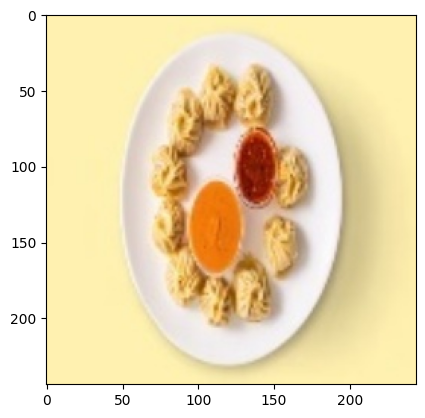

In [7]:
img_path = '/content/drive/MyDrive/dataset/train/momo/momo_1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Load Images using ImageDataGenerator
 - Loads images from dir in batch size instead of one by one
 - allows to rotate, zoom and flip
 - automatically labels images based on folder name e.g  Images in /train/momo are labeled as 'momo'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Define path for train and test dataset

In [9]:
train_path = dataset_path + '/train'
test_path = dataset_path  + '/test'
train_path

'/content/drive/MyDrive/dataset/train'

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# load train data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(244, 244), # img size
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

# load test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(244, 244), # img size
    batch_size=32,
    class_mode='categorical'
)

Found 495 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


class labels

In [11]:
train_generator.class_indices

{'chowmein': 0, 'momo': 1, 'thakali': 2}

### Visualize Images

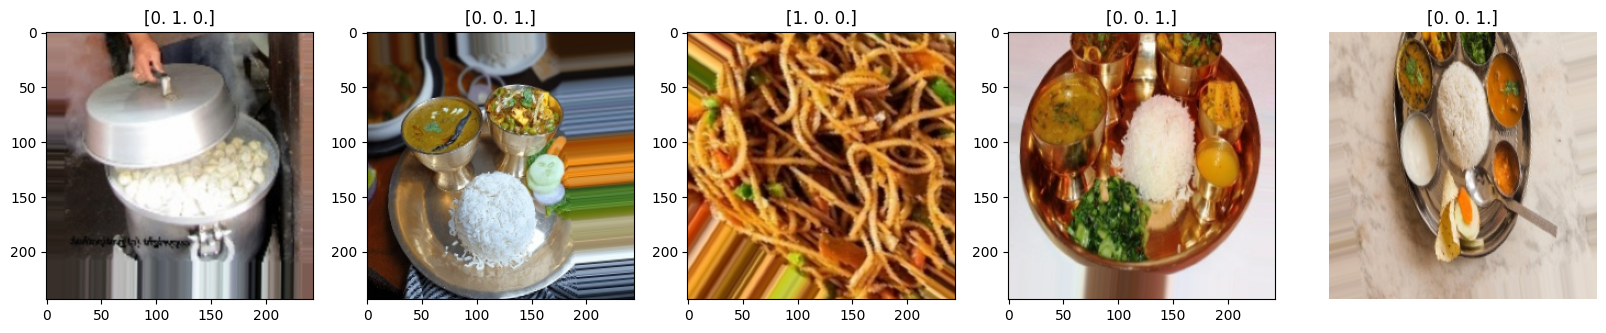

In [12]:
img, labels = next(train_generator)
fig, axis = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
  axis[i].imshow(img[i])
  axis[i].set_title(labels[i])
plt.axis('off')
plt.show()

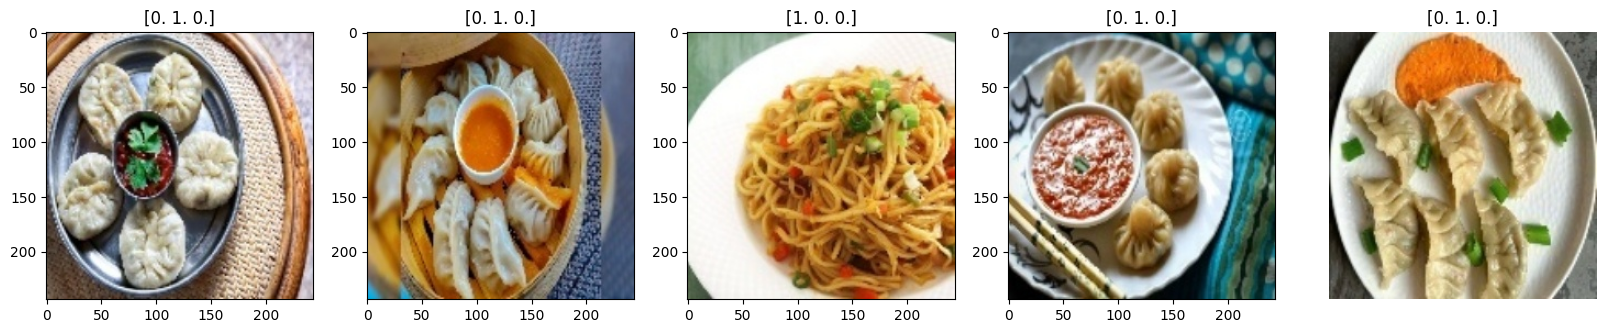

In [13]:
test_img, test_labels = next(test_generator)
n_img_to_plot = min(5, len(test_img))
fig, axis = plt.subplots(1, n_img_to_plot, figsize=(20, 20))

if n_img_to_plot == 1:
  axis.imshow(test_img[0])
else:
  for i in range(n_img_to_plot):
    axis[i].imshow(test_img[i])
    axis[i].set_title(test_labels[i])
plt.axis('off')
plt.show()

### Build CNN model for classification using simple model architecture

In [14]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
model = models.Sequential([
    # extract features from images
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(244, 244, 3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dropout(0.2), # ignore some neuron while training
    layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=10)
mcp_save = ModelCheckpoint('/content/drive/MyDrive/dataset/model.weights.h5', save_best_only=True, monitor='val_loss')

history = model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[earlyStopping, mcp_save], batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.3437 - loss: 7.7918

16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3443 - loss: 7.5879 - val_accuracy: 0.3333 - val_loss: 1.0660
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.4386 - loss: 1.0283

16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4412 - loss: 1.0265 - val_accuracy: 0.5455 - val_loss: 0.9438
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6068 - loss: 0.8866

16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6070 - loss: 0.8845 - val_accuracy: 0.6364 - val_loss: 0.7920
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 485ms/step - accuracy: 0.6322 - loss: 0.7996 - val_accuracy: 0.6364 - val_loss: 0.8228
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6607 - loss: 0.7649 - val_accuracy: 0.6364 - val_loss: 0.8837
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.7057 - loss: 0.7859

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 813ms/step - accuracy: 0.7062 - loss: 0.7831 - val_accuracy: 0.6061 - val_loss: 0.7899
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.7145 - loss: 0.6438

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 899ms/step - accuracy: 0.7148 - loss: 0.6451 - val_accuracy: 0.6667 - val_loss: 0.7794
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7892 - loss: 0.5361

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7883 - loss: 0.5370 - val_accuracy: 0.9091 - val_loss: 0.4731
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8106 - loss: 0.5090 - val_accuracy: 0.7879 - val_loss: 0.5475
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 562ms/step - accuracy: 0.8204 - loss: 0.5089 - val_accuracy: 0.6364 - val_loss: 1.0809
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 547ms/step - accuracy: 0.7947 - loss: 0.5323 - val_accuracy: 0.7879 - val_loss: 1.3259
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 488ms/step - accuracy: 0.8481 - loss: 0.4667 - val_accuracy: 0.7273 - val_loss: 1.4846
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 561ms/step - accuracy: 0.8714 - loss: 0.3953 - val_accuracy: 0.7879 - val_loss: 1.0032
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 565ms/step - accuracy: 0.8767 - loss: 0.3276 - val_accuracy: 0.7576 - val_loss: 0.4772
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 486ms/step - accuracy: 0.8827 - loss: 0.3229 - val_accuracy: 0.7

In [33]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6326 - loss: 0.9067 


0.6363636255264282

### plot training history

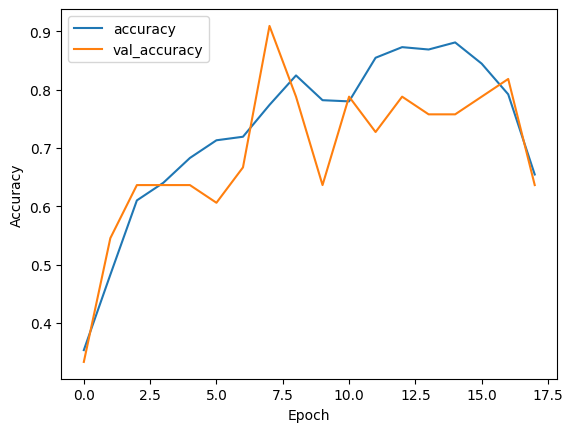

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Save Model for testing purpose still need to increase accuracy of model

In [ ]:
model.save(dataset_path + 'my_model.h5')

In [16]:
my_model = models.load_model(dataset_path + 'my_model.h5')
my_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 147968)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │      14,796,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,890,453 (56.80 MB)

 Trainable params: 14,890,451 (56.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Load momo image from Drive

In [17]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

In [55]:
def prepare_image(path):
    img = cv2.imread(path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (244, 244))  # Resize to 150x150
    img = img.astype("float32") / 255.0  # Normalize
    img = img_to_array(img)  # Convert to array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [40]:
m_img = prepare_image('/content/drive/MyDrive/dataset/momos.jpg')
m_img.shape

(1, 244, 244, 3)

In [53]:
my_model.predict(m_img)

InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/dense_2_1/MatMul defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [1,415872], In[1]: [147968,100]

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-41-3bdce420c304>", line 1, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py", line 144, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 3815, in matmul
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 501, in matmul

	 [[{{node sequential_1_1/dense_2_1/MatMul}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_67163[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_67186]

In [21]:
np.argmax(my_model.predict(m_img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


np.int64(2)

In [22]:
train_generator.class_indices

{'chowmein': 0, 'momo': 1, 'thakali': 2}

### Plot True vs Predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

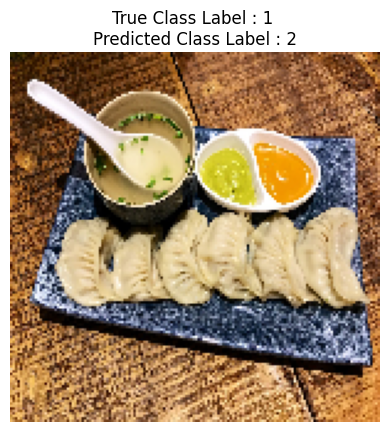

In [23]:
plt.imshow(m_img[0])
plt.title(f'True Class Label : {train_generator.class_indices["momo"]} \nPredicted Class Label : {np.argmax(my_model.predict(m_img))}')
plt.axis('off')

### Chowmein pic

In [24]:
chowmein = prepare_image('/content/drive/MyDrive/dataset/chowmein.jpg')
chowmein.shape

(1, 150, 150, 3)

In [25]:
np.argmax(my_model.predict(chowmein))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


np.int64(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

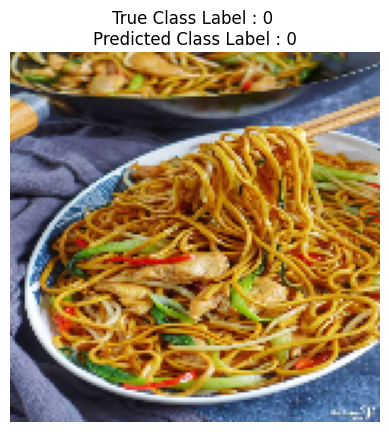

In [26]:
plt.imshow(chowmein[0])
plt.title(f'True Class Label : {train_generator.class_indices["chowmein"]} \nPredicted Class Label : {np.argmax(my_model.predict(chowmein))}')
plt.axis('off')

### Building Model using EfficentNetB0 CNN Architectural
consists of 237 layers includes Convolutional layers, BatchNormalization, Activation layer, pooling and Dense layer

In [64]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam

In [68]:
efficentNet_model = EfficientNetB0(include_top=False,weights='imagenet', input_shape=(244, 244, 3))
# efficentNet_model.trainable = False

# for layer in efficentNet_model.layers[:200]:
#   layer.trainable = False

model2 = models.Sequential([
    efficentNet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(120, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')
])


earlyStopping = EarlyStopping(monitor='val_loss', patience=10)
mcp_save = ModelCheckpoint('/content/drive/MyDrive/dataset/model.weights.h5', save_best_only=True, monitor='val_loss')

model2.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_generator, epochs=100, batch_size=32, validation_data=test_generator, callbacks=[earlyStopping, mcp_save])

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3457 - loss: 1.1095   

16/16 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.3478 - loss: 1.1085 - val_accuracy: 0.3333 - val_loss: 1.1042
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 69s 578ms/step - accuracy: 0.4509 - loss: 1.0595 - val_accuracy: 0.3333 - val_loss: 1.1073
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 586ms/step - accuracy: 0.5566 - loss: 0.9894 - val_accuracy: 0.3333 - val_loss: 1.1050
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.6911 - loss: 0.8766

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 627ms/step - accuracy: 0.6898 - loss: 0.8773 - val_accuracy: 0.3636 - val_loss: 1.1014
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 508ms/step - accuracy: 0.7216 - loss: 0.8423 - val_accuracy: 0.3636 - val_loss: 1.1032
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 688ms/step - accuracy: 0.7654 - loss: 0.7968 - val_accuracy: 0.3939 - val_loss: 1.1074
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 654ms/step - accuracy: 0.8424 - loss: 0.7085 - val_accuracy: 0.2727 - val_loss: 1.1155
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 555ms/step - accuracy: 0.8554 - loss: 0.6598 - val_accuracy: 0.2121 - val_loss: 1.1123
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 538ms/step - accuracy: 0.9106 - loss: 0.5979 - val_accuracy: 0.2121 - val_loss: 1.1032
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.8568 - loss: 0.5631

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 684ms/step - accuracy: 0.8584 - loss: 0.5617 - val_accuracy: 0.2727 - val_loss: 1.0919
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9330 - loss: 0.5085

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 695ms/step - accuracy: 0.9316 - loss: 0.5094 - val_accuracy: 0.3030 - val_loss: 1.0880
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.9123 - loss: 0.4693

16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 749ms/step - accuracy: 0.9131 - loss: 0.4681 - val_accuracy: 0.3636 - val_loss: 1.0819
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.9322 - loss: 0.4054

16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 799ms/step - accuracy: 0.9325 - loss: 0.4052 - val_accuracy: 0.3939 - val_loss: 1.0725
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.9620 - loss: 0.3702

16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 783ms/step - accuracy: 0.9620 - loss: 0.3703 - val_accuracy: 0.4242 - val_loss: 1.0692
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 719ms/step - accuracy: 0.9537 - loss: 0.3304 - val_accuracy: 0.3939 - val_loss: 1.0833
Epoch 16/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 581ms/step - accuracy: 0.9566 - loss: 0.3094 - val_accuracy: 0.3333 - val_loss: 1.1031
Epoch 17/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 576ms/step - accuracy: 0.9317 - loss: 0.3120 - val_accuracy: 0.3333 - val_loss: 1.1207
Epoch 18/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 518ms/step - accuracy: 0.9685 - loss: 0.2478 - val_accuracy: 0.3636 - val_loss: 1.1134
Epoch 19/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 579ms/step - accuracy: 0.9709 - loss: 0.2323 - val_accuracy: 0.3333 - val_loss: 1.1064
Epoch 20/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 582ms/step - accuracy: 0.9687 - loss: 0.2109 - val_accuracy: 0.3030 - val_loss: 1.0932
Epoch 21/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 516ms/step - accuracy: 0.9711 - loss: 0.2066 - val_accurac

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 667ms/step - accuracy: 0.9670 - loss: 0.1704 - val_accuracy: 0.3939 - val_loss: 1.0493
Epoch 25/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.9778 - loss: 0.1565

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 576ms/step - accuracy: 0.9779 - loss: 0.1559 - val_accuracy: 0.3939 - val_loss: 1.0243
Epoch 26/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.9776 - loss: 0.1417

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 606ms/step - accuracy: 0.9777 - loss: 0.1409 - val_accuracy: 0.4242 - val_loss: 0.9703
Epoch 27/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - accuracy: 0.9765 - loss: 0.1373

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 797ms/step - accuracy: 0.9765 - loss: 0.1371 - val_accuracy: 0.4242 - val_loss: 0.9432
Epoch 28/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.9915 - loss: 0.1143

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 781ms/step - accuracy: 0.9914 - loss: 0.1151 - val_accuracy: 0.5455 - val_loss: 0.8749
Epoch 29/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.9846 - loss: 0.1358

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 648ms/step - accuracy: 0.9848 - loss: 0.1350 - val_accuracy: 0.6667 - val_loss: 0.7565
Epoch 30/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.9815 - loss: 0.1109

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 640ms/step - accuracy: 0.9812 - loss: 0.1115 - val_accuracy: 0.8182 - val_loss: 0.5620
Epoch 31/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9769 - loss: 0.1142

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 762ms/step - accuracy: 0.9774 - loss: 0.1133 - val_accuracy: 0.8788 - val_loss: 0.5130
Epoch 32/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - accuracy: 0.9799 - loss: 0.1010

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 865ms/step - accuracy: 0.9801 - loss: 0.1008 - val_accuracy: 0.9091 - val_loss: 0.4594
Epoch 33/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9816 - loss: 0.0989

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 579ms/step - accuracy: 0.9816 - loss: 0.0988 - val_accuracy: 0.9091 - val_loss: 0.4435
Epoch 34/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.9964 - loss: 0.0644

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 643ms/step - accuracy: 0.9963 - loss: 0.0649 - val_accuracy: 0.9091 - val_loss: 0.4197
Epoch 35/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.9712 - loss: 0.0880

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 774ms/step - accuracy: 0.9721 - loss: 0.0872 - val_accuracy: 0.9091 - val_loss: 0.3715
Epoch 36/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.9949 - loss: 0.0617

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 642ms/step - accuracy: 0.9947 - loss: 0.0619 - val_accuracy: 0.9091 - val_loss: 0.3631
Epoch 37/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.9823 - loss: 0.0870

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 639ms/step - accuracy: 0.9825 - loss: 0.0863 - val_accuracy: 0.9091 - val_loss: 0.3496
Epoch 38/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 521ms/step - accuracy: 0.9895 - loss: 0.0736 - val_accuracy: 0.9091 - val_loss: 0.3608
Epoch 39/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 722ms/step - accuracy: 0.9722 - loss: 0.0938 - val_accuracy: 0.9091 - val_loss: 0.3502
Epoch 40/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.9702 - loss: 0.0959

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 684ms/step - accuracy: 0.9703 - loss: 0.0960 - val_accuracy: 0.9394 - val_loss: 0.3438
Epoch 41/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 580ms/step - accuracy: 0.9948 - loss: 0.0501 - val_accuracy: 0.9394 - val_loss: 0.3743
Epoch 42/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 517ms/step - accuracy: 0.9834 - loss: 0.0762 - val_accuracy: 0.9394 - val_loss: 0.3849
Epoch 43/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 589ms/step - accuracy: 0.9930 - loss: 0.0514 - val_accuracy: 0.9394 - val_loss: 0.3913
Epoch 44/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 578ms/step - accuracy: 0.9920 - loss: 0.0678 - val_accuracy: 0.9394 - val_loss: 0.3994
Epoch 45/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 540ms/step - accuracy: 0.9949 - loss: 0.0483 - val_accuracy: 0.9394 - val_loss: 0.3680
Epoch 46/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.9972 - loss: 0.0453

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 682ms/step - accuracy: 0.9969 - loss: 0.0458 - val_accuracy: 0.9394 - val_loss: 0.3097
Epoch 47/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.9966 - loss: 0.0330

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 779ms/step - accuracy: 0.9966 - loss: 0.0332 - val_accuracy: 0.9394 - val_loss: 0.2918
Epoch 48/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.9920 - loss: 0.0524

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 753ms/step - accuracy: 0.9921 - loss: 0.0523 - val_accuracy: 0.9394 - val_loss: 0.2719
Epoch 49/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 690ms/step - accuracy: 0.9947 - loss: 0.0437 - val_accuracy: 0.9394 - val_loss: 0.3010
Epoch 50/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 598ms/step - accuracy: 0.9903 - loss: 0.0473 - val_accuracy: 0.9394 - val_loss: 0.3712
Epoch 51/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 516ms/step - accuracy: 0.9939 - loss: 0.0452 - val_accuracy: 0.9394 - val_loss: 0.3775
Epoch 52/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 594ms/step - accuracy: 0.9779 - loss: 0.0706 - val_accuracy: 0.9394 - val_loss: 0.3492
Epoch 53/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 581ms/step - accuracy: 0.9984 - loss: 0.0323 - val_accuracy: 0.9394 - val_loss: 0.3641
Epoch 54/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 511ms/step - accuracy: 0.9993 - loss: 0.0296 - val_accuracy: 0.9394 - val_loss: 0.3812
Epoch 55/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 600ms/step - accuracy: 0.9684 - loss: 0.0743 - val_accur

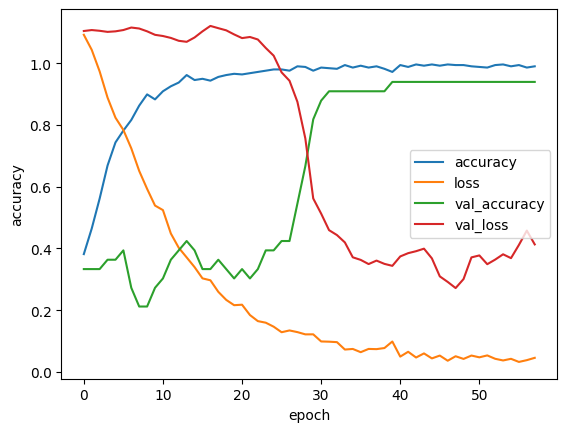

In [69]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [62]:
test_loss, test_acc = model2.evaluate(test_generator)
test_acc

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3368 - loss: 3.0468 


0.3333333432674408

### Save pre-trained Model2 using EfficentNetB0 architechture

In [63]:
model2.save('/content/drive/MyDrive/dataset/model2.h5')

In [31]:
m_img.shape

(1, 150, 150, 3)

In [44]:
model2.predict(m_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


array([[0.01500753, 0.9769437 , 0.00804882]], dtype=float32)

In [45]:
np.argmax(model2.predict(m_img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


np.int64(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


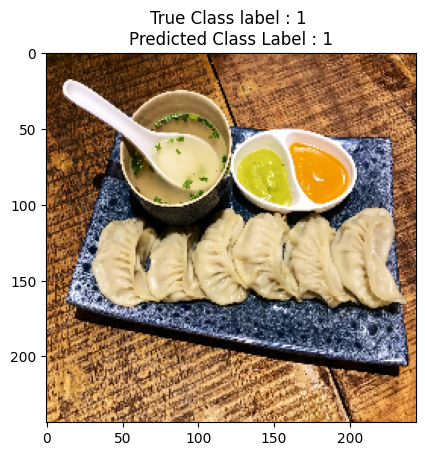

In [46]:
plt.imshow(m_img[0])
plt.title(f"True Class label : {test_generator.class_indices['momo']} \nPredicted Class Label : {np.argmax(model2.predict(m_img))}")
plt.show()

In [47]:
thakali_test_img = prepare_image('/content/drive/MyDrive/dataset/thakali.jpg')
thakali_test_img.shape

(1, 244, 244, 3)

In [48]:
model2.predict(thakali_test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.01694383, 0.9769419 , 0.00611434]], dtype=float32)

# Error predicting class label 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


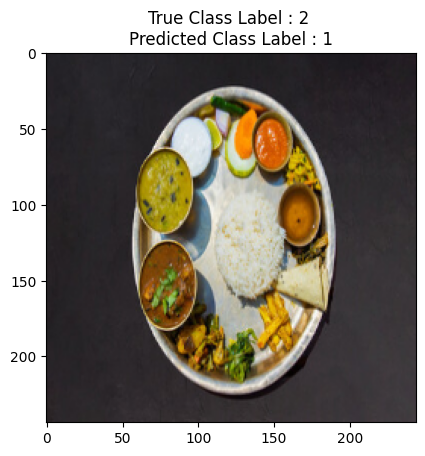

In [49]:
plt.imshow(thakali_test_img[0])
plt.title(f"True Class Label : {test_generator.class_indices['thakali']} \nPredicted Class Label : {np.argmax(model2.predict(thakali_test_img))}")
plt.show()

In [50]:
train_generator.class_indices

{'chowmein': 0, 'momo': 1, 'thakali': 2}

In [70]:
# thakali2 = '/content/drive/MyDrive/dataset/thakali2.jpg'
thakali2 = '/content/thakali2.jpg'
thakali2 = prepare_image(thakali2)
thakali2.shape

(1, 244, 244, 3)

In [71]:
model2.predict(thakali2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


array([[0.00157675, 0.00209989, 0.99632335]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


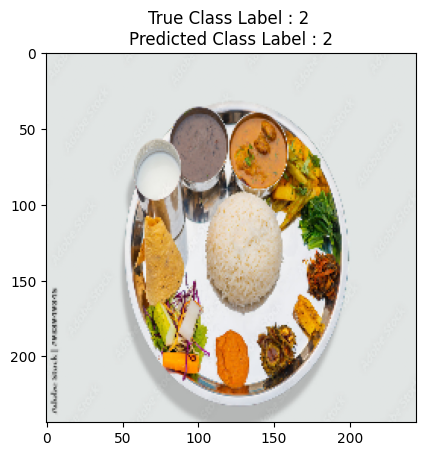

In [73]:
plt.imshow(thakali2[0])
plt.title(f"True Class Label : {test_generator.class_indices['thakali']} \nPredicted Class Label : {np.argmax(model2.predict(thakali2))}")
plt.show()